<a href="https://colab.research.google.com/github/ARPITA1312/Comparitive-study-of-various-CNN-Models/blob/main/CNN_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import os

In [ ]:
dataset_dir = "/content/drive/MyDrive/Cervical_Cancer_Dataset"
img_height, img_width = 224, 224
batch_size = 32

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 4049 files belonging to 2 classes.
Using 3240 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 4049 files belonging to 2 classes.
Using 809 files for validation.


In [ ]:
class_names = train_ds.class_names
print(f"Classes: {class_names}")

Classes: ['Test', 'Training']


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE).cache()
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE).cache()

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.2),
])

#RESNET50

In [ ]:
#RESNET50
base_model = tf.keras.applications.ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(img_height, img_width, 3)
)
base_model.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(img_height, img_width, 3)),
    data_augmentation,
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.4),  # Increased dropout for regularization
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
initial_epochs = 5
history = model.fit(train_ds, validation_data=val_ds, epochs=initial_epochs)

Epoch 1/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 0.8643 - loss: 0.3709 - val_accuracy: 0.8986 - val_loss: 0.3006
Epoch 2/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 206s 2s/step - accuracy: 0.8642 - loss: 0.3739 - val_accuracy: 0.8986 - val_loss: 0.3002
Epoch 3/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 262s 2s/step - accuracy: 0.8643 - loss: 0.3719 - val_accuracy: 0.8986 - val_loss: 0.2971
Epoch 4/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 206s 2s/step - accuracy: 0.8639 - loss: 0.3667 - val_accuracy: 0.8986 - val_loss: 0.2977
Epoch 5/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.8643 - loss: 0.3700 - val_accuracy: 0.8986 - val_loss: 0.2974


In [ ]:
loss, accuracy = model.evaluate(val_ds)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

26/26 ━━━━━━━━━━━━━━━━━━━━ 157s 6s/step - accuracy: 0.9174 - loss: 0.2332
Validation Loss: 0.23648665845394135
Validation Accuracy: 0.9122373461723328


In [ ]:
pip install matplotlib

Text(0.5, 1.0, 'Model Accuracy')

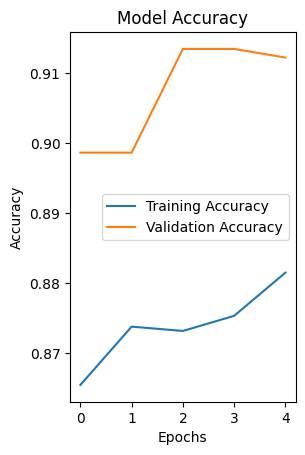

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

Text(0.5, 1.0, 'Model Loss')

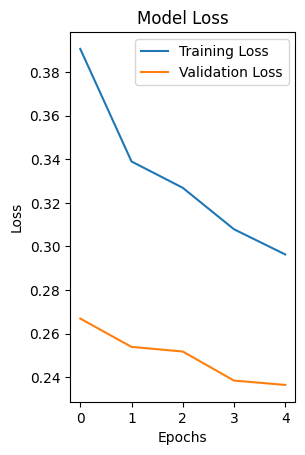

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

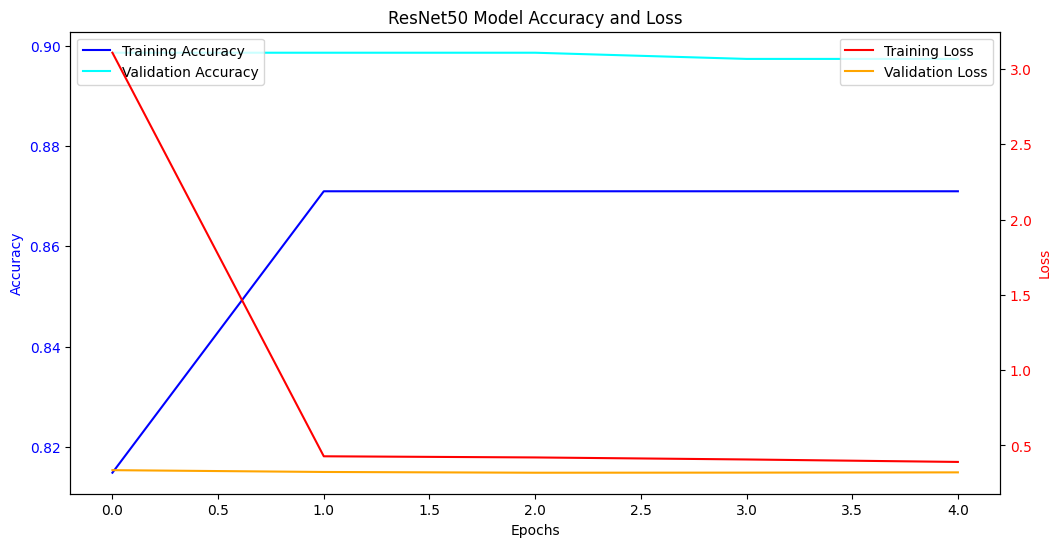

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', color='cyan')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

ax2.plot(history.history['loss'], label='Training Loss', color='red')
ax2.plot(history.history['val_loss'], label='Validation Loss', color='orange')
ax2.set_ylabel('Loss', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

plt.title('ResNet50 Model Accuracy and Loss')

plt.show()


#VGG16

In [ ]:
#VGG16
base_model = tf.keras.applications.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(img_height, img_width, 3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(img_height, img_width, 3)),
    data_augmentation,
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.4),  # Increased dropout for regularization
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
initial_epochs = 5
history = model.fit(train_ds, validation_data=val_ds, epochs=initial_epochs)

Epoch 1/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 2666s 26s/step - accuracy: 0.7885 - loss: 1.1545 - val_accuracy: 0.8986 - val_loss: 0.2915
Epoch 2/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 2567s 25s/step - accuracy: 0.8484 - loss: 0.3940 - val_accuracy: 0.8986 - val_loss: 0.2869
Epoch 3/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 2606s 25s/step - accuracy: 0.8573 - loss: 0.3621 - val_accuracy: 0.8999 - val_loss: 0.2698
Epoch 4/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 2570s 25s/step - accuracy: 0.8623 - loss: 0.3491 - val_accuracy: 0.9023 - val_loss: 0.2743
Epoch 5/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 2591s 25s/step - accuracy: 0.8631 - loss: 0.3515 - val_accuracy: 0.9011 - val_loss: 0.2650


In [ ]:
loss, accuracy = model.evaluate(val_ds)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

26/26 ━━━━━━━━━━━━━━━━━━━━ 513s 20s/step - accuracy: 0.9014 - loss: 0.2594
Validation Loss: 0.26498398184776306
Validation Accuracy: 0.9011124968528748


Text(0.5, 1.0, 'Model Accuracy')

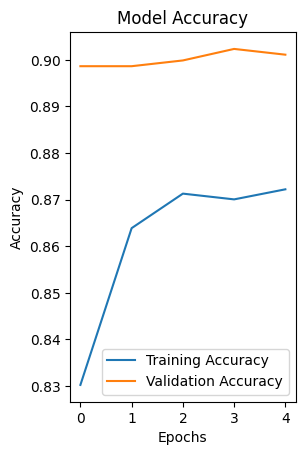

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

Text(0.5, 1.0, 'Model Loss')

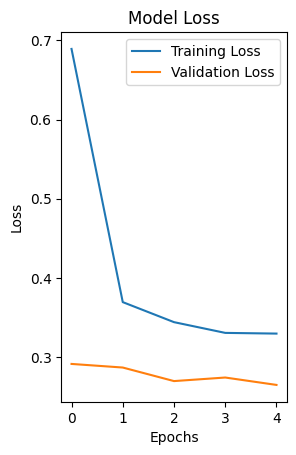

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

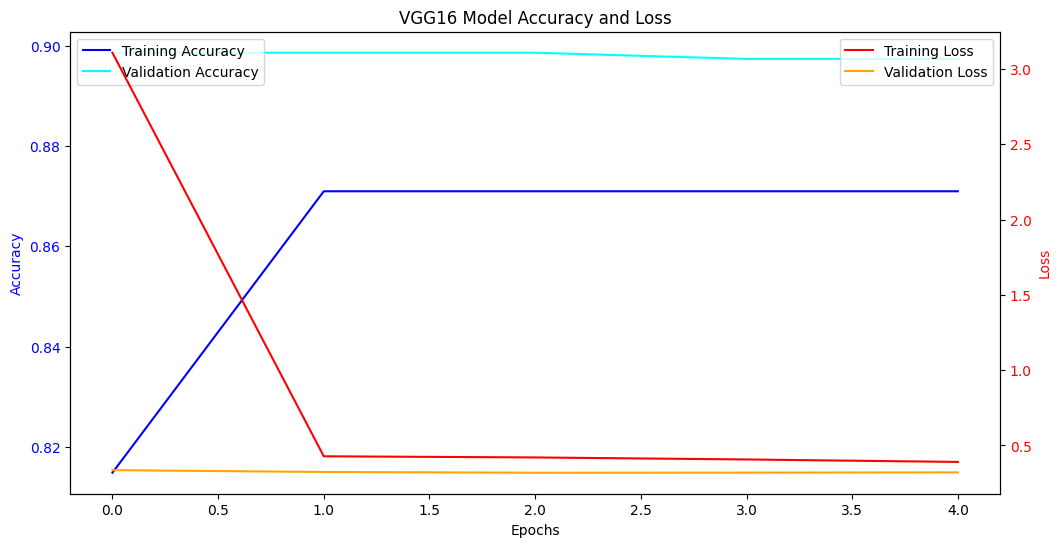

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', color='cyan')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

ax2.plot(history.history['loss'], label='Training Loss', color='red')
ax2.plot(history.history['val_loss'], label='Validation Loss', color='orange')
ax2.set_ylabel('Loss', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

plt.title('VGG16 Model Accuracy and Loss')

plt.show()


#MobileNetV2

In [ ]:
#MobileNetV2
base_model = tf.keras.applications.MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(img_height, img_width, 3)
)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(img_height, img_width, 3)),
    data_augmentation,
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.4),  # Regularization
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
initial_epochs = 5
history = model.fit(train_ds, validation_data=val_ds, epochs=initial_epochs)


Epoch 1/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 0.8088 - loss: 0.6183 - val_accuracy: 0.8986 - val_loss: 0.3153
Epoch 2/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.8643 - loss: 0.3912 - val_accuracy: 0.8986 - val_loss: 0.3052
Epoch 3/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.8643 - loss: 0.3753 - val_accuracy: 0.8986 - val_loss: 0.3044
Epoch 4/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.8643 - loss: 0.3796 - val_accuracy: 0.8986 - val_loss: 0.3018
Epoch 5/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 210s 2s/step - accuracy: 0.8643 - loss: 0.3727 - val_accuracy: 0.8986 - val_loss: 0.3005


In [ ]:
loss, accuracy = model.evaluate(val_ds)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

26/26 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.8985 - loss: 0.2996
Validation Loss: 0.3005056381225586
Validation Accuracy: 0.8986402750015259


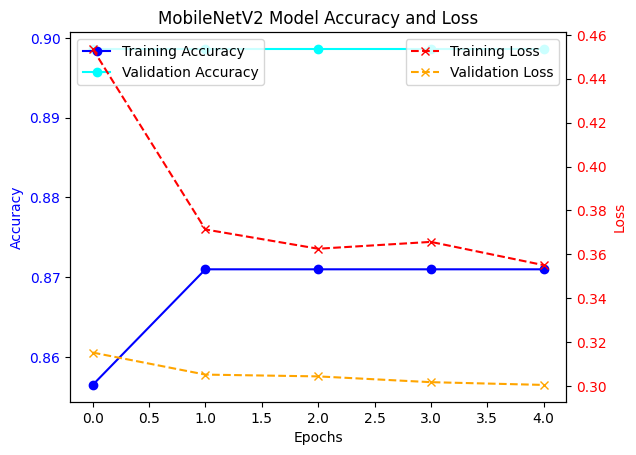

In [ ]:
ax1 = plt.subplot(111)
ax2 = ax1.twinx()
ax1.plot(history.history['accuracy'], label='Training Accuracy', color='blue', marker='o')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', color='cyan', marker='o')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')
ax2.plot(history.history['loss'], label='Training Loss', color='red', linestyle='--', marker='x')
ax2.plot(history.history['val_loss'], label='Validation Loss', color='orange', linestyle='--', marker='x')
ax2.set_ylabel('Loss', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

plt.title('MobileNetV2 Model Accuracy and Loss')
plt.show()

#EfficientNetB0

In [ ]:
#EfficientNetB0
base_model = tf.keras.applications.EfficientNetB0(
    weights='imagenet',
    include_top=False,
    input_shape=(img_height, img_width, 3)
)
base_model.trainable = False

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(img_height, img_width, 3)),
    data_augmentation,
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.4),  # Regularization
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
initial_epochs = 5
history = model.fit(train_ds, validation_data=val_ds, epochs=initial_epochs)

Epoch 1/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 430s 4s/step - accuracy: 0.8459 - loss: 0.4375 - val_accuracy: 0.8986 - val_loss: 0.2980
Epoch 2/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 344s 3s/step - accuracy: 0.8633 - loss: 0.3657 - val_accuracy: 0.8986 - val_loss: 0.2970
Epoch 3/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 344s 3s/step - accuracy: 0.8618 - loss: 0.3711 - val_accuracy: 0.8986 - val_loss: 0.2922
Epoch 4/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 364s 4s/step - accuracy: 0.8660 - loss: 0.3682 - val_accuracy: 0.8986 - val_loss: 0.2788
Epoch 5/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 345s 3s/step - accuracy: 0.8658 - loss: 0.3428 - val_accuracy: 0.8986 - val_loss: 0.2756


In [ ]:
loss, accuracy = model.evaluate(val_ds)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

26/26 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.8985 - loss: 0.2686
Validation Loss: 0.27563950419425964
Validation Accuracy: 0.8986402750015259


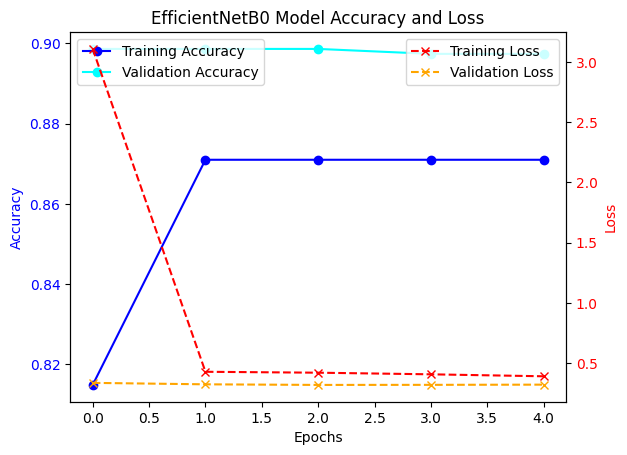

In [ ]:
ax1 = plt.subplot(111)
ax2 = ax1.twinx()

ax1.plot(history.history['accuracy'], label='Training Accuracy', color='blue', marker='o')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', color='cyan', marker='o')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

ax2.plot(history.history['loss'], label='Training Loss', color='red', linestyle='--', marker='x')
ax2.plot(history.history['val_loss'], label='Validation Loss', color='orange', linestyle='--', marker='x')
ax2.set_ylabel('Loss', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')
plt.title('EfficientNetB0 Model Accuracy and Loss')
plt.show()

#InceptionV3

In [ ]:
#InceptionV3
img_height, img_width = 299, 299  #InceptionV3 requires 299x299 images
batch_size = 32

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

class_names = train_ds.class_names
print(f"Classes: {class_names}")

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE).cache()
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE).cache()

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.2),
])

Found 4049 files belonging to 2 classes.
Using 3240 files for training.
Found 4049 files belonging to 2 classes.
Using 809 files for validation.
Classes: ['Test', 'Training']


In [ ]:
base_model = tf.keras.applications.InceptionV3(
    weights='imagenet',
    include_top=False,
    input_shape=(img_height, img_width, 3)
)
base_model.trainable = False

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(img_height, img_width, 3)),
    data_augmentation,
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.4),  # Regularization
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
initial_epochs = 5
history = model.fit(train_ds, validation_data=val_ds, epochs=initial_epochs)

Epoch 1/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 1119s 11s/step - accuracy: 0.7746 - loss: 6.9741 - val_accuracy: 0.8986 - val_loss: 0.3360
Epoch 2/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 1145s 11s/step - accuracy: 0.8649 - loss: 0.4389 - val_accuracy: 0.8986 - val_loss: 0.3240
Epoch 3/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 1091s 11s/step - accuracy: 0.8643 - loss: 0.4332 - val_accuracy: 0.8986 - val_loss: 0.3190
Epoch 4/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 1104s 11s/step - accuracy: 0.8643 - loss: 0.4170 - val_accuracy: 0.8974 - val_loss: 0.3197
Epoch 5/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 1085s 11s/step - accuracy: 0.8643 - loss: 0.3966 - val_accuracy: 0.8974 - val_loss: 0.3214


In [ ]:
loss, accuracy = model.evaluate(val_ds)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

26/26 ━━━━━━━━━━━━━━━━━━━━ 205s 8s/step - accuracy: 0.8979 - loss: 0.3177
Validation Loss: 0.32137858867645264
Validation Accuracy: 0.8974041938781738


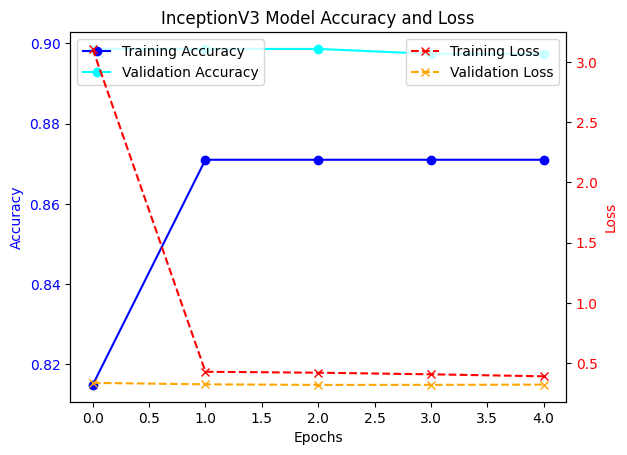

In [ ]:
ax1 = plt.subplot(111)
ax2 = ax1.twinx()

ax1.plot(history.history['accuracy'], label='Training Accuracy', color='blue', marker='o')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', color='cyan', marker='o')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

ax2.plot(history.history['loss'], label='Training Loss', color='red', linestyle='--', marker='x')
ax2.plot(history.history['val_loss'], label='Validation Loss', color='orange', linestyle='--', marker='x')
ax2.set_ylabel('Loss', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

plt.title('InceptionV3 Model Accuracy and Loss')
plt.show()

#Model comparison between 'ResNet50', 'VGG16', 'MobileNetV2', 'EfficientNetB0', 'InceptionV3'


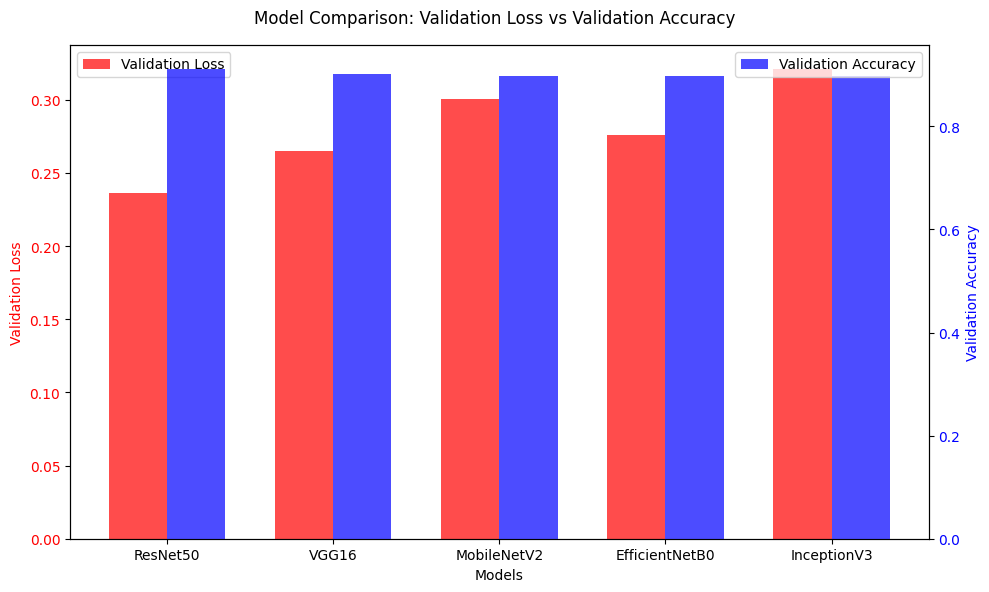

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['ResNet50', 'VGG16', 'MobileNetV2', 'EfficientNetB0', 'InceptionV3']
val_loss = [0.23648665845394135, 0.26498398184776306, 0.3005056381225586, 0.27563950419425964, 0.32137858867645264]
val_accuracy = [0.9122373461723328, 0.9011124968528748, 0.8986402750015259, 0.8986402750015259, 0.8974041938781738]

bar_width = 0.35
x = np.arange(len(models))

fig, ax1 = plt.subplots(figsize=(10, 6))

bars1 = ax1.bar(x - bar_width / 2, val_loss, bar_width, label='Validation Loss', color='red', alpha=0.7)
ax1.set_xlabel('Models')
ax1.set_ylabel('Validation Loss', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.set_xticks(x)
ax1.set_xticklabels(models)

ax2 = ax1.twinx()
bars2 = ax2.bar(x + bar_width / 2, val_accuracy, bar_width, label='Validation Accuracy', color='blue', alpha=0.7)
ax2.set_ylabel('Validation Accuracy', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

fig.suptitle('Model Comparison: Validation Loss vs Validation Accuracy')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()